<a href="https://colab.research.google.com/github/kmaloba/OOP-repository/blob/main/PART_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv

GENERATE A PYTHON SCRIPT THAT YOU CAN USE TO SCRAP THE PROVIDED WEBSITE TO ACCESS THE DATA. SAVE YOUR DATA AS ‘YOUR_LAST_NAME.CSV’

In [ ]:
# URL of the website to scrape
url = "https://wheeloffortuneanswer.com/"


In [ ]:
#Send a GET request to fetch the page content
response = requests.get(url)
response.raise_for_status()

In [ ]:
#Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
#Find the table in HTML
table = soup.find('table')

In [ ]:
#Extract table headers
headers = [header.text.strip() for header in table.find_all('th')]

In [ ]:
#Extract the table rows
data = []
for row in table.find_all('tr')[1:]:
    columns = row.find_all('td')
    data.append([col.text.strip() for col in columns])

In [ ]:
#create a pandas data frame
df = pd.DataFrame(data, columns=headers)

In [ ]:
#save to CSV
df.to_csv('maloba.csv', index=False)

GENERATE A VISUAL TO DEPICT THE “WORD TO GUESS” VARIABLE IN THE ABOVE DATASET

In [ ]:

import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("maloba.csv")

# Plot word length distribution
plt.figure(figsize=(12, 6))
plt.hist(df["Total Letters"],
         bins=range(1, df["Total Letters"].max()+2),
         edgecolor="white",
         alpha=0.7)

plt.title("Distribution of Puzzle Word Lengths", fontsize=14)
plt.xlabel("Number of Letters", fontsize=12)
plt.ylabel("Number of Puzzles", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

KeyError: 'Total Letters'

<Figure size 1200x600 with 0 Axes>

GENERATE VISUAL(S) THAT WOULD BEST PRESENT THE NEWS ARTICLE TO A WIDE AUDIENCE.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Load dataset
df = pd.read_csv('European news.csv')

In [ ]:
# Display dataset information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Articles  2225 non-null   object
 1   labels    2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB
None
                                            Articles         labels
0  Musicians to tackle US red tape  Musicians gro...  entertainment
1  U2s desire to be number one  U2, who have won ...  entertainment
2  Rocker Doherty in on-stage fight  Rock singer ...  entertainment
3  Snicket tops US box office chart  The film ada...  entertainment
4  Oceans Twelve raids box office  Oceans Twelve,...  entertainment


C:\Users\GADGET DUUKA\AppData\Local\Temp\ipykernel_5296\781522061.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["labels"], order=df["labels"].value_counts().index, palette="viridis")


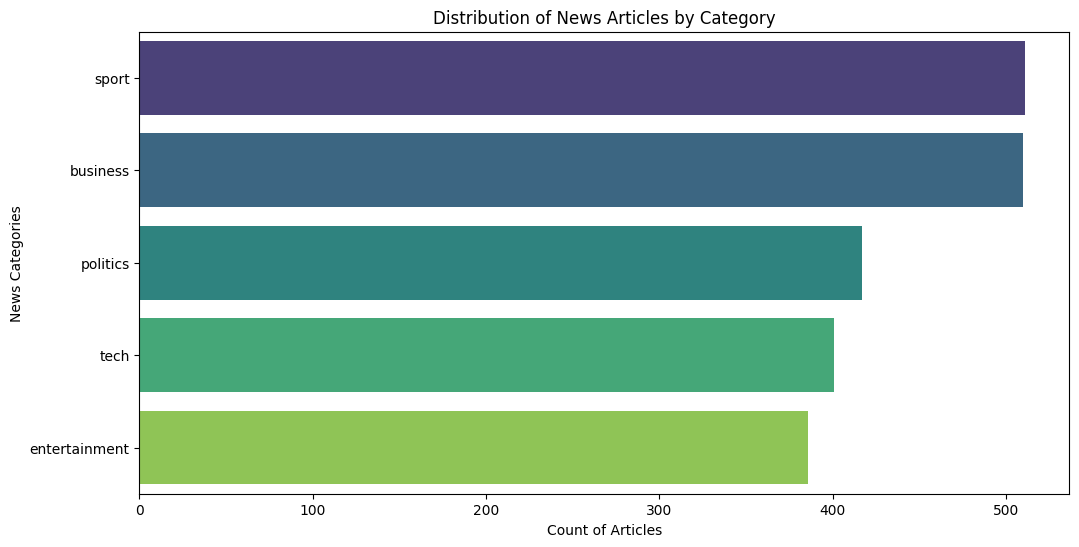

In [ ]:
# Data Visualization: Distribution of news articles by category
plt.figure(figsize=(12,6))
sns.countplot(y=df["labels"], order=df["labels"].value_counts().index, palette="viridis")
plt.xlabel("Count of Articles")
plt.ylabel("News Categories")
plt.title("Distribution of News Articles by Category")
plt.show()

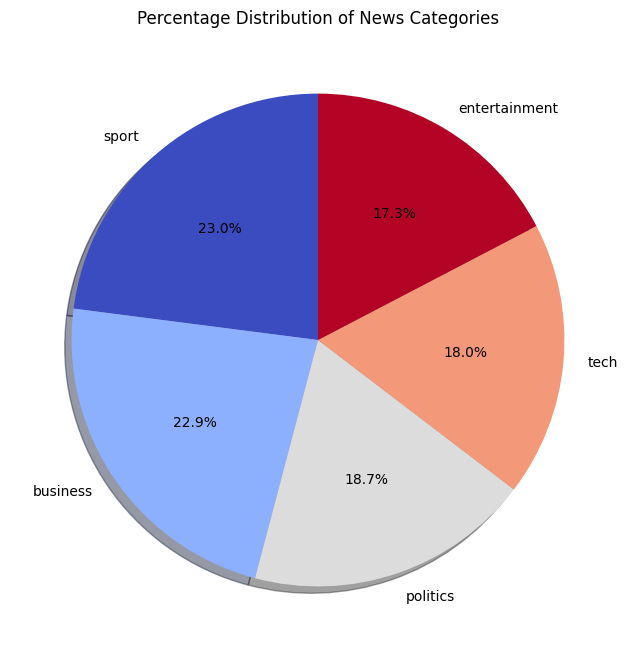

In [ ]:
 #Pie Chart of News Categories
plt.figure(figsize=(8,8))
df["labels"].value_counts().plot.pie(autopct="%1.1f%%", cmap="coolwarm", startangle=90, shadow=True)
plt.ylabel("")
plt.title("Percentage Distribution of News Categories")
plt.show()

In [ ]:
# Word Cloud for Most Common Words in Articles
from wordcloud import WordCloud
text = " ".join(df["Articles"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

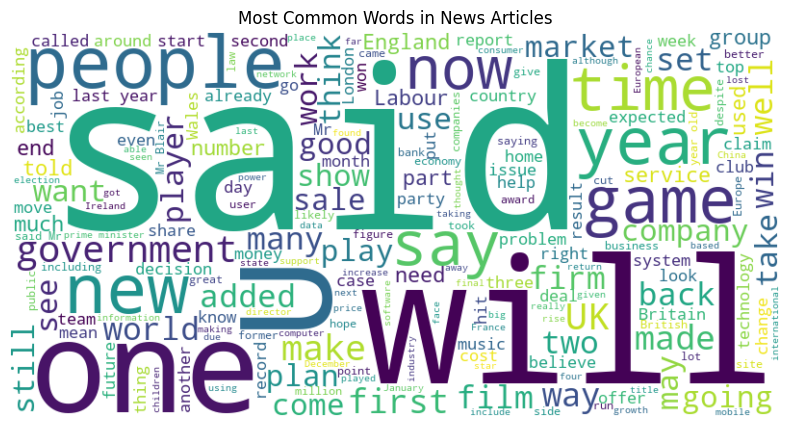

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in News Articles")
plt.show()

GENERATE A NATURAL LANGUAGE PROCESSING ALGORITHM THAT WOULD BEST CLASSIFY THE NEWS ARTICLES.

In [ ]:
# NLP Model for News Classification
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["Articles"], df["labels"], test_size=0.2, random_state=42)


In [ ]:
# Create a text classification pipeline
model = make_pipeline(TfidfVectorizer(stop_words="english"), MultinomialNB())

In [ ]:
# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

In [ ]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2%}")
print("Classification Report:\n", report)

Model Accuracy: 97.30%
Classification Report:
                precision    recall  f1-score   support

     business       0.97      0.99      0.98       103
entertainment       1.00      0.94      0.97        84
     politics       0.92      0.99      0.95        80
        sport       0.98      0.99      0.98        98
         tech       1.00      0.95      0.97        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445

